# Week 4 Group Assignment

### Group Name: Motor City Motor Equity
### Group Member: Akshay Jalluri
## Overview: 
For this assignment, I will be making updates to the previous version, making 4 major updates. First, I will be converting all matplotlib charts into interactive plotly charts, defining & calling custom functions to simplify code, adding bus stop data to the maps & overlaying the existing maps, and also making plots from Travel Behavior Household survey

All the sections I made updates to will have the section titles be in <font color='red'> <b> red

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px   # New one for making these interactive plots 

In [201]:
dataMichigan = pd.read_csv('data/RaceInMichigan.csv', dtype = {'FIPS': str})

In [202]:
dataMichigan.shape             # This shows the dimension of the dataframe, 3017 entries and 322 columns

(3017, 322)

In [203]:
dataMichigan.sample(3)            # This just gives a sample of the first 5 rows just to see the format of the table without taking too much room

,FIPS,NAME,DP1_0001C,DP1_0002C,DP1_0003C,DP1_0004C,DP1_0005C,DP1_0006C,DP1_0007C,DP1_0008C,...,DP1_0151P,DP1_0152P,DP1_0153P,DP1_0154P,DP1_0155P,DP1_0156P,DP1_0157P,DP1_0158P,DP1_0159P,DP1_0160P
1547,26121000500,Census Tract 5; Muskegon County; Michigan,4906,367,449,415,444,292,311,321,...,0.2,1.6,0.8,0.9,4,(X),(X),100,42,58
1825,26125167800,Census Tract 1678; Oakland County; Michigan,4978,279,226,213,239,355,542,449,...,0,0.2,0.1,0.2,0.4,(X),(X),100,47.4,52.6
508,26049013112,Census Tract 131.12; Genesee County; Michigan,4839,218,286,333,447,237,146,220,...,0.1,0.6,0.5,3.1,1.2,(X),(X),100,96.8,3.2


In [204]:
dataMichigan.info()                                                # We now know the data type of each column of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Columns: 322 entries, FIPS to DP1_0160P
dtypes: float64(2), int64(155), object(165)
memory usage: 7.4+ MB


In [205]:
dataMichigan.columns[dataMichigan.isna().all()].tolist()           # We are checking to see if there are any columns with all blank values

[]

Looks like there is no empty columns, as seen in the statement printed statement above, so no need to drop any of them

## Setting Up & Filtering Data

Since we only care about race, and not the other columns that are shown in here like gender, age, marital status, etc. we will only keep columns that include relevent information about race. Here is what each column we are keeping means:
- FIPS = Geographic area
- DP1_0076C = Total population 
- DP1_0086C = White population (both alone and in combination with other races included)
- DP1_0087C = Black population (both alone and in combination with other races included)
- DP1_0088C = American Indian & Alaska Native population (both alone and in combination with other races included)
- DP1_0089C = Asian population (both alone and in combination with other races included)
- DP1_0090C = Native Hawaiian & Other Pacific Islander population (both alone and in combination with other races included)
- DP1_0096C = Hispanic or Latino (both alone and in combination with other races included)

In [206]:
race_columns = ['FIPS', 'DP1_0076C', 'DP1_0105C', 'DP1_0087C', 'DP1_0088C', 'DP1_0089C', 'DP1_0090C', 'DP1_0096C']                     # Making a array of all the columns from dataMichigan that I want to keep

raceMichigan = dataMichigan[race_columns]                   # Making a new dataframe that will only include the relevent race
raceMichigan.sample(3)

,FIPS,DP1_0076C,DP1_0105C,DP1_0087C,DP1_0088C,DP1_0089C,DP1_0090C,DP1_0096C
1412,26103001700,2266,2069,27,86,32,1,34
2008,26139021603,4603,4126,112,96,77,3,178
1245,26099240602,3408,2976,212,46,88,0,52


Ideally, you would want the sum of all the populations of each race to add up to the total population in the census track. However, if you look through the rows, you will see that the sum of all these populations exceed the total population. The reason for this is that those of multiple races will count in multiple race categories, hence double/triple counting them when adding them up. So, don't worry about the sums not adding up to the total population, that detail will not affect any of the results of this analysis.

In [207]:
# Renaming the column headers to names that make sense to a reader
raceMichigan.columns = ['FIPS', 'Total Population', 'White', 'Black', 'Native American', 'Asian', 'Pacific Islander', 'Hispanic or Latino']
raceMichigan.sample(3)

,FIPS,Total Population,White,Black,Native American,Asian,Pacific Islander,Hispanic or Latino
217,26025002800,4401,3980,75,196,20,4,102
1884,26125184200,4174,3532,163,46,241,1,155
1462,26111290600,2366,2027,129,59,33,5,102


We now want to narrow it down into just metro-Detroit, not the whole state of Michigan. For our analysis, we will only look at the 3 main counties that comprise of metro-Detroit, which is Wayne County, Oakland County, and Macomb County. The FIPS county code for Wayne County is 163, Oakland County is 125, and for Macomb County is 099. Since the FIPS state code is 26, the format is state then county code, we only want to include FIPS codes that start with 26163, 26125, and 26099 

In [208]:
counties = raceMichigan['FIPS'].str[2:5].to_numpy()                        # Make a new array of all the county codes for each row
raceMichigan.insert(loc=1, column='County', value=counties)                # Add the county codes to the dataframe into the column right next to FIPS column
raceMichigan.head(3)

,FIPS,County,Total Population,White,Black,Native American,Asian,Pacific Islander,Hispanic or Latino
0,26001000100,001,1690,1630,11,25,5,0,14
1,26001970100,001,2340,2168,23,45,15,4,46
2,26001970400,001,2833,2688,32,71,13,2,18


In [209]:
# Only including rows where the county codes are 163 (Wayne County), 125 (Oakland County), and 099 (Macomb County)
raceMetroDetroit = raceMichigan[raceMichigan['County'].isin(['163','125','099'])]

# Renaming the county codes into the names of the actual county itself to increase readability
raceMetroDetroit.loc[:,'County'] = raceMetroDetroit['County'].replace({'163': 'Wayne', '125': 'Oakland', '099': 'Macomb'})

# Resetting the row indexing to start from 0
raceMetroDetroit.reset_index(drop=True, inplace=True)
raceMetroDetroit.sample(7)

,FIPS,County,Total Population,White,Black,Native American,Asian,Pacific Islander,Hispanic or Latino
1083,26163579501,Wayne,1520,656,471,68,11,0,364
94,26099240000,Macomb,4554,2288,1891,135,45,6,245
1151,26163591800,Wayne,6189,4324,812,120,444,4,442
260,26125125600,Oakland,2758,2479,35,91,24,2,87
350,26125141100,Oakland,3143,1236,1183,94,109,10,597
964,26163564501,Wayne,6122,4014,423,72,1327,2,231
23,26099222104,Macomb,3222,2334,444,116,50,0,276


Now we have all the data needed in order to conduct an analysis on racial profile in metro-Detroit

## Racial Profile of Detroit</font>

Let's start off by doing a racial profile by county and see the racial distributions within each county. We will also make a stacked bar chart to better visualize the racial profile

In [210]:
raceMetroDetroit['Total Population'].describe()            # This shows statistical information about total populaiton within a census track within metro-Detroit

count    1221.000000
mean     3234.375921
std      1571.221283
min         0.000000
25%      2220.000000
50%      3110.000000
75%      4160.000000
max      9049.000000
Name: Total Population, dtype: float64

### <font color='red'> Change
<font color='red'> I heavily simplified this code down by making a custom function

In [212]:
# Before, we had all the formulas for each combination of race and county written out. Now, we were able to simplify it into making our own function 

def countyracecount(county, race):
    count = raceMetroDetroit.loc[raceMetroDetroit['County'] == county, race].sum()          # Runs the formula
    name = county + race                           # Make a string that combines the the county name and race
    name = name.replace(" ", "")                   # Remove any spaces so that it can become a valid variable name in the future
    return [count, name]


# These are the list of all the counties and races
counties = ['Wayne', 'Oakland', 'Macomb']
races = ['White', 'Black', 'Asian', 'Hispanic or Latino', 'Native American', 'Pacific Islander']

populations = []
countyRaces = []

for county in counties:
    for race in races:
        population, countyRace = countyracecount(county, race)
        populations.append(population)
        countyRaces.append(countyRace)        

Now we can plot this data into a stacked bar chart with each of the 3 bars being each county, and having each section within a bar being their race

## <font color='red'>  Make it into an Interactive Plotly Plot
<font color='red'> Making the new dataset into a forloop rather than manually typing them out. Also, we changed it to a interactive plotly plot

In [213]:
# We must make a new dataset with only the information that is needed for the interactive chart
# This only includes the data that we need, which is the population totals for each race and for each county. So we can delete the FIPS column
# We can make use of all the math we did above for getting the population sums for each race in each county and make a new dataframe out of it

countiesRace = {}

for i in range(len(races)-1):
    list = {races[i] : [populations[i], populations[i+6], populations[i+12]]}
    countiesRace.update(list)

countiesRace = pd.DataFrame(countiesRace, index=counties)
countiesRace

,White,Black,Asian,Hispanic or Latino,Native American
Wayne,857132,712698,79719,117649,35132
Oakland,879137,188810,120040,60838,21387
Macomb,665241,123254,46283,26214,16388


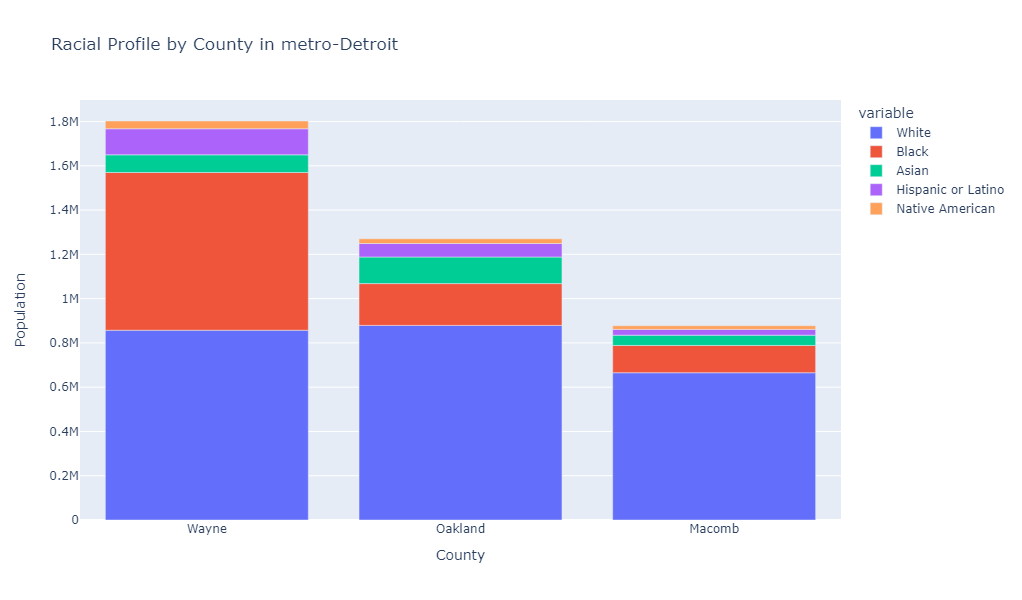

In [214]:
# <ake a stacked bar chart. This is in a wide dataset format, so we must use the px.bar syntax that accomodates for this type of dataframe
fig = px.bar(countiesRace, 
             x = counties,
             y = countiesRace.columns.tolist(),
             title = "Racial Profile by County in metro-Detroit",
             width=1000, 
             height=600,
             labels={'x':'County' , 'value':'Population'})

fig.show()

As you see, the majority of the Black population is in Wayne County, almost equallying that of the White population. Wayne County is also where the city of Detroit is as well. The Black population in Oakland and Macomb counties are much smaller than that of Wayne County. There also seems to be a greater Hispanic over Asian population in Wayne County too as opposed to Oakland and Macomb Counties. The Native American/Alaska Native and Native Hawaiian/Pacific Islander populations are very small in all 3 counties, as expected. For the midterm project on transportation equity in metro-Detroit, this graph can give us a general idea of where the different racial populations are on a county level.

Next, let's dive deeper into trying to find correlations between the races on an individual cencus tract level.

## Quantifying Racial Segregation using Index of Dissimilarity

We can look at Index of Dissimilarity (D), which is the most common measure of segregation. The larger the number, the more segregation there is. To find this Index of Dissimilarity, we use this formula.
$$ D = \dfrac{1}{2}\Sigma^{n}_{i=1} |\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}| $$
where $n$ is number of census tracts, $a_i$ is population of race a in tract i, $A_T$ is total population of race a, $b_i$ is population of race b in tract i, $B_T$ is total population of race b 
We can also make a map of each single dissimilarity index for each census tract for each race combination

Let's compare segregation of White population vs Black population, White population vs Asian population, and White population vs Hispanic population. From visual inspection of the table, I decided to not include Native American or Pacific Islander comparisons because those populations are too small to make an accurate judgement of the measure of segregation.

### <font color='red'> Change
<font color='red'> Added a custom function

In [216]:
# Before, we had all the formulas for each combination of race and county written out. Now, we were able to simplify it into making our own function

def IndexDissimilarity(race):
    totalWhite = raceMetroDetroit['White'].sum()                                  # First find total of White population. We sum the values from each of the rows within the White columns
    proportion = []                                                               # Creating an empty list that will get added onto later
    
    for i in range(len(raceMetroDetroit)):                                        # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
        a = raceMetroDetroit.loc[i,'White']                                       # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
        b = raceMetroDetroit.loc[i, race]                                         # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
        value = abs((a/totalWhite) - (b/raceMetroDetroit[race].sum()))            # This is the |(a_i/A_T) - (b_i/B_T)| part of the formula and it yields the value for the particular cencus tract
        proportion.append(value)                                                  # That value now gets appended to the array, which will keep adding on as it iterates thorugh each census tract
    indexDissimilarity = 100 * 0.5 * sum(proportion)                              # All the values of the array need to be summed as the formula requires a summation and the 100x is to convert to percentage
    return round(indexDissimilarity, 2)

dissimilarity = []                                                                # This will be used for later when plotting

for i in range(1,4):                                                              # I chose range(1,4) because we are excluding "White" because we are only focusing on minorities and comparing them to whites
    index = IndexDissimilarity(races[i])                                          # Calling the IndexDissimilarity function
    dissimilarity.append(index)                                                   # Adding each of the index values to the dissimilarity list above
    print('The Index of Dissimilarity of White vs ' + str(races[i]) + ' population is: ' + str(index) + '%')    # Printing out the values

The Index of Dissimilarity of White vs Black population is: 68.02%
The Index of Dissimilarity of White vs Asian population is: 45.35%
The Index of Dissimilarity of White vs Hispanic or Latino population is: 40.52%


What does the Index of Dissimilarity mean. Since we got 68.02% for White vs Black population, this would mean that 68.02% of Blacks would need to move in order to achieve a uniform distribution by race. That is a lot of people that would have to move, that just shows how un-uniform and segregated current metro-Detroit is right now.

### <font color='red'> Change
<font color='red'> Converted it to a Plotly plot

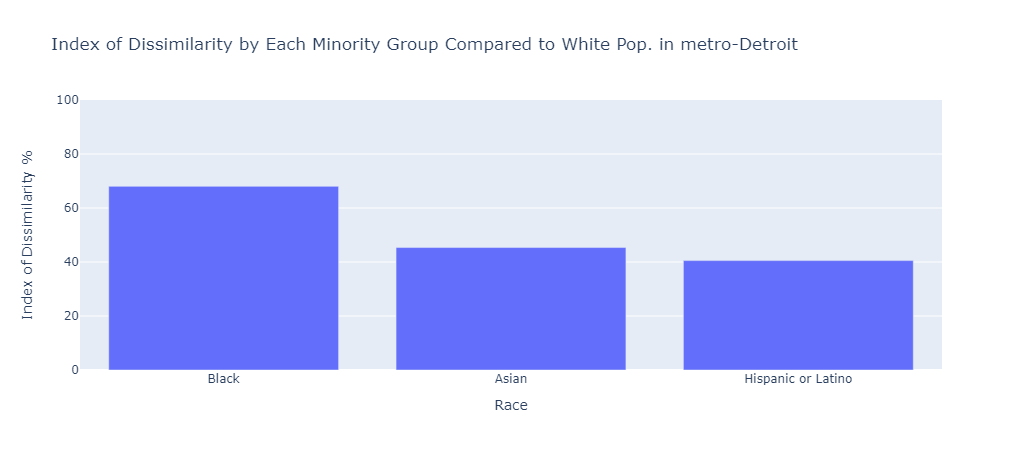

In [240]:
# When making a plotly graph, we must put our data into a dataframe
rows = races[1:4]                                           # Naming our rows by the 3 races we are looking at, Black, Asian, Hispanic
dissimilarityRace = pd.DataFrame(index = rows)              # Making it into a dataframe
dissimilarityRace['Index of Dissimilarity'] = dissimilarity     # Adding dissimilarity values to the dataframe

# Now making an interactive plotly graph out of this
fig = px.bar(dissimilarityRace, 
             labels= {'index':'Race', 'value':'Index of Dissimilarity %'},
             width=800, 
             height=450,
             title = "Index of Dissimilarity by Each Minority Group Compared to White Pop. in metro-Detroit")

# Removing the legend and making the y-axis of the graph go up to 100% to better show percentages
fig.update_layout(showlegend = False)
fig.update_yaxes(range=[0, 100])

fig.show()

## Setting up and Filtering GeoData

In [234]:
import geopandas as gpd                                            # In order to map geographical coordinates, we need to import the geopandas library

In [235]:
michiganTracts = gpd.read_file('data/tl_2020_26_tract.zip')        # Reading in the geojson file of Michigan with the geometries of the cencus track boundaries
michiganTracts.sample(2)                  

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1022,26,163,985300,26163985300,9853,Census Tract 9853,G5020,S,1081123,403980,+42.3203926,-083.0701382,"POLYGON ((-83.07798 42.31757, -83.07751 42.317..."
2895,26,055,551000,26055551000,5510,Census Tract 5510,G5020,S,6330269,4452488,+44.7765846,-085.5748092,"POLYGON ((-85.60539 44.76294, -85.60540 44.763..."


Now we need to filter out the rows so that it only includes the metro-Detroit region which comprise of Wayne County (163), Oakland County (125), and Macomb County (099)

In [236]:
metroDetroitTracts = michiganTracts[michiganTracts['COUNTYFP'].isin(['163','125','099'])]    # Keeping only rows with CountyFP = 163, 125, and 099
metroDetroitTracts.sample(2)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2036,26,125,128900,26125128900,1289,Census Tract 1289,G5020,S,14966138,324296,+42.7351386,-083.2338682,"POLYGON ((-83.24652 42.75206, -83.24651 42.752..."
2738,26,099,245000,26099245000,2450,Census Tract 2450,G5020,S,2362892,117937,+42.6001817,-082.8664728,"POLYGON ((-82.87819 42.59694, -82.87805 42.597..."


We are going to merge this tract data with the raceMetroDetroit dataframe so that all the data is in one dataframe. To be able to do the merge, we are going to select the column in which we will be able to do the merge, which in this case will be the FIPS code. To be able to do a merge, the column we are merging on has to contain the same name in both dataframes. In raceMetroDetroit dataframe it is called "FIPS" and in metroDetroitTracts it is called "GEOID". So I must change that.


In [242]:
# Change the column header in metroDetroitTracts dataframe from "GEOID" to "FIPS"
metroDetroitTracts.rename(columns = {'GEOID':'FIPS'}, inplace = True)

# Now merge this dataframe to the raceMetroDetroit dataframe
metroDetroitTracts_race = metroDetroitTracts.merge(raceMetroDetroit, on='FIPS')

# Removing the columns we don't need
metroDetroitTracts_race.drop(columns = ['STATEFP', 'COUNTYFP', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'], inplace = True)

metroDetroitTracts_race.sample(5)

/tmp/ipykernel_112/2293766603.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,TRACTCE,FIPS,geometry,County,Total Population,White,Black,Native American,Asian,Pacific Islander,Hispanic or Latino
428,161900,26125161900,"POLYGON ((-83.26078 42.47242, -83.25969 42.472...",Oakland,2384,491,1714,35,63,8,106
1078,255600,26099255600,"POLYGON ((-82.94814 42.50933, -82.94716 42.509...",Macomb,3311,2456,528,119,100,0,90
1051,589300,26163589300,"POLYGON ((-83.48280 42.17555, -83.48256 42.175...",Wayne,3609,2926,398,134,40,4,102
884,151000,26125151000,"POLYGON ((-83.26437 42.53142, -83.26431 42.532...",Oakland,5471,4895,86,48,249,0,139
698,563600,26163563600,"POLYGON ((-83.48867 42.33658, -83.48573 42.336...",Wayne,2078,1547,126,53,280,1,98


Now we have all the data in place to be able to make maps. Let's plot it and find the distribution of each race within metro-Detroit

## Mapping the GeoData

Although we now have all the data we need, before we map it it is better to look 

In [243]:
# Doing it by percentages is a better way of representing this to account for total population differences between populations
metroDetroitTracts_race['PCT_Black'] = metroDetroitTracts_race['Black']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_White'] = metroDetroitTracts_race['White']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_Asian'] = metroDetroitTracts_race['Asian']/metroDetroitTracts_race['Total Population']*100
metroDetroitTracts_race['PCT_Hispanic'] = metroDetroitTracts_race['Hispanic or Latino']/metroDetroitTracts_race['Total Population']*100

### <font color='red'> Change
<font color='red'> Arranged the 4 maps in a grid to make it easier to read

Text(0.5, 1.0, 'Distribution of Hispanic or Latino Community')

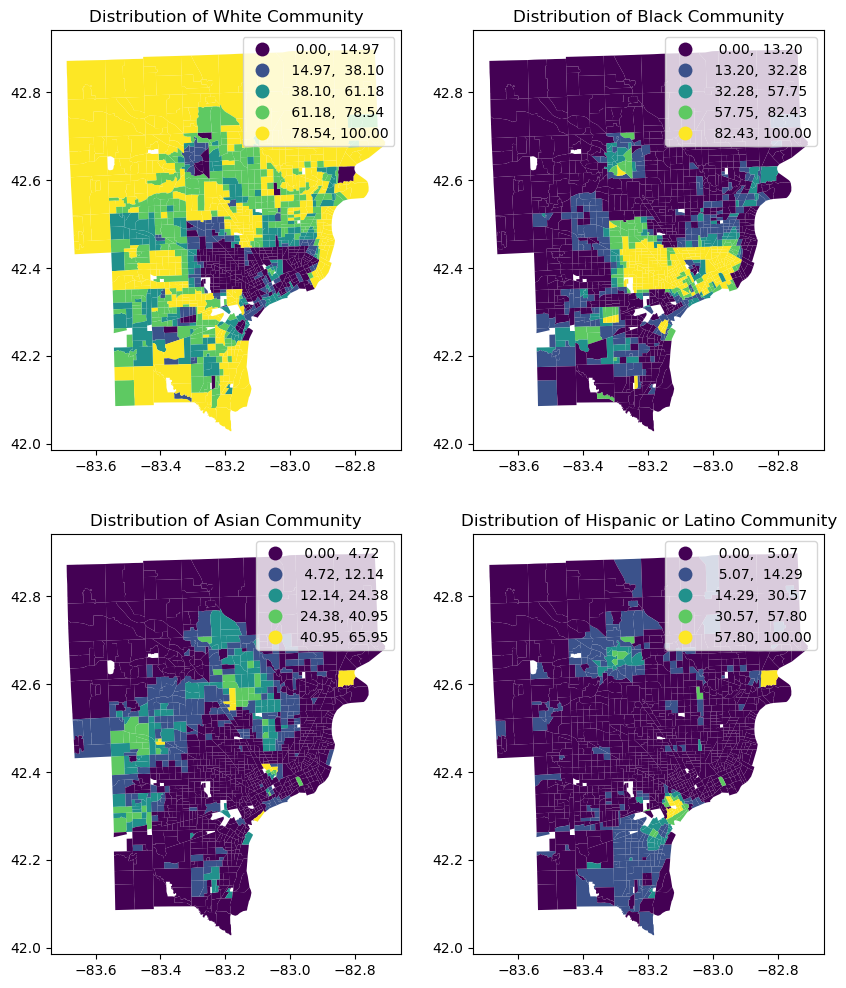

In [247]:
# Let's plot this in a 2x2 grid so that it shows up a little more organized rather than 4 seperate images
# Makes it easier to see comparisons as well

fig, axs = plt.subplots(2,2, figsize=(10,12))

# Plotting the population distribution for the White community
metroDetroitTracts_race.plot(ax = axs[0,0], column='PCT_White', legend=True, scheme='NaturalBreaks')
axs[0, 0].set_title('Distribution of White Community')

# Plotting the population distribution for the Black community
metroDetroitTracts_race.plot(ax = axs[0,1], column='PCT_Black', legend=True, scheme='NaturalBreaks')
axs[0, 1].set_title('Distribution of Black Community')

# Plotting the population distribution for the Asian community
metroDetroitTracts_race.plot(ax = axs[1,0], column='PCT_Asian', legend=True, scheme='NaturalBreaks')
axs[1, 0].set_title('Distribution of Asian Community')

# Plotting the population distribution for the Hispanic or Latino community
metroDetroitTracts_race.plot(ax = axs[1,1], column='PCT_Hispanic', legend=True, scheme='NaturalBreaks')
axs[1, 1].set_title('Distribution of Hispanic or Latino Community')


We did that Index of Dissimilarity Analysis before, but now we can actually map that data. Rather than creating seperate maps for White community distribution and black community distribution, we can now create a map that indicates the segregation between White and Black communtiies. From the Index of Dissimilarity formula, we can make use of $\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}$ term in the formula where $a_i$ is population of race a in tract i, $A_T$ is total population of race a, $b_i$ is population of race b in tract i, $B_T$ is total population of race b.

This term is very powerful, because a value of 0 means that there is equal proportion of the races within the census track. For example, say that there is 200 White people in the whole city and 100 Black people in the whole city. Looking within one census tract within the city, if there is 20 White people in the census tract, for there to be no segregation, there should be 10 Black people within that same census tract, as both 10% of White people and 10% of Black people of the city would be living within the census tract. Plugging these numbers into the formula term $\dfrac{a_i}{A_T} - \dfrac{b_i}{B_T}$ will become $\dfrac{20}{200} - \dfrac{10}{100} $ which is $0$.

If the term yields a positive number, it would indicate that there are proportionally more of race A, and if the term yields a negative number, it would indicate that therer are proportionally more of race B.

In [249]:
# Creating an array of dissimilarity values for each census tract

totalWhite = metroDetroitTracts_race['White'].sum()
totalBlack = metroDetroitTracts_race['Black'].sum()
WhiteBlack = []


for i in range(len(metroDetroitTracts_race)):                                           # Creating a for-loop that iterates through each of the rows and adds onto the above array. i is the index of the particular tract 
    a = metroDetroitTracts_race.loc[i,'White']                                          # In dissimilarity formula, a is the population of one race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    b = metroDetroitTracts_race.loc[i,'Black']                                          # In dissimilarity formula, b is the population of the other race within the certain cencus tract, which in this case is tract i, as it iterates through all of them
    value = (a/totalWhite) - (b/totalBlack)                                             # This is the (a_i/A_T) - (b_i/B_T) part of the formula and it yields the value for the particular cencus tract
    WhiteBlack.append(value)                                                            # That value now gets appended to the array called WhiteBlack, which will keep adding on as it iterates thorugh each census tract

In [250]:
# Adding this array as a new column in the metroDetroitTracts_race dataframe and naming it as metroDetroitTracts_dissimRace
metroDetroitTracts_dissimRace = metroDetroitTracts_race.copy()                          # Making a copy of the existing dataframe
metroDetroitTracts_dissimRace['WhiteBlack Dissimilarity'] = WhiteBlack                  # Adding a new column to the new dataframe and inserting the WhiteBlack array from above into that column

metroDetroitTracts_dissimRace.sample(5)

,TRACTCE,FIPS,geometry,County,Total Population,White,Black,Native American,Asian,Pacific Islander,Hispanic or Latino,PCT_Black,PCT_White,PCT_Asian,PCT_Hispanic,WhiteBlack Dissimilarity
490,541100,26163541100,"POLYGON ((-83.24982 42.42931, -83.24853 42.429...",Wayne,2921,54,2792,37,19,3,38,95.583704,1.848682,0.650462,1.300924,-2.702049e-03
218,141001,26125141001,"POLYGON ((-83.29644 42.69911, -83.29623 42.699...",Oakland,2974,979,960,86,142,6,907,32.279758,32.918628,4.774714,30.497646,-5.291427e-04
1066,251400,26099251400,"POLYGON ((-82.91761 42.48567, -82.91759 42.485...",Macomb,3065,2729,146,54,54,5,73,4.763458,89.037520,1.761827,2.381729,9.938963e-04
646,985200,26163985200,"POLYGON ((-82.98296 42.38759, -82.98227 42.387...",Wayne,3,1,1,1,1,0,1,33.333333,33.333333,33.333333,33.333333,-5.594317e-07
1107,231600,26099231600,"POLYGON ((-83.08878 42.56384, -83.08809 42.563...",Macomb,4966,3705,398,42,670,4,116,8.014499,74.607330,13.491744,2.335884,1.154396e-03


Text(0.5, 1.0, 'Distribution of White and Black Populations in Metro-Detroit')

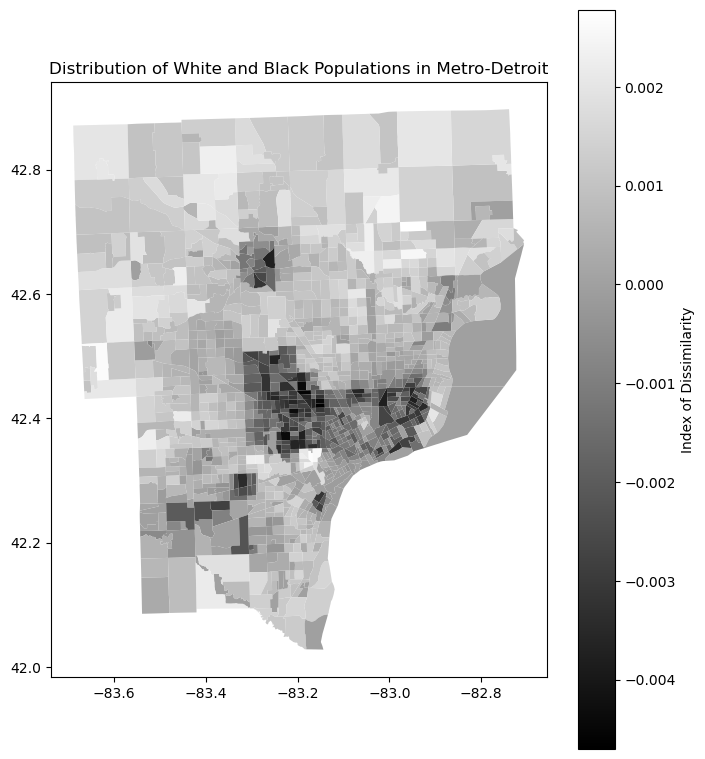

In [252]:
# Plotting the dissimilarity between White and Black community in metro-Detroit
metroDetroitTracts_dissimRace.plot(figsize=(8,9.6), 
                                   column = 'WhiteBlack Dissimilarity', 
                                   legend = True, cmap = 'gray', 
                                   legend_kwds={"label": "Index of Dissimilarity"})
plt.title('Distribution of White and Black Populations in Metro-Detroit')

Looking at this map above, we can see the areas that are more prodominantly White and areas that are prodominantly Black. We used the Index of Dissimilarity measure to obtain this. When doing transportation analysis in this area, we will need to keep these these racial disparities in mind

Now we can make an interactive version of this map using Folium

In [32]:
import folium
from folium import plugins

In [1]:
# Creating the basemap
m = folium.Map(location = [42.3317,-83.0471],
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')


# Now adding our data on top of the basemap
folium.Choropleth(geo_data = metroDetroitTracts_dissimRace,            # geo data
                  data = metroDetroitTracts_dissimRace,                # data
                  key_on='feature.properties.FIPS',                    # key, or merge column
                  columns=['FIPS', 'WhiteBlack Dissimilarity'],        # [key, value]
                  fill_color='Greys_r',
                  line_weight=0.1,
                  fill_opacity=0.8,
                  line_opacity=0.2,                                    # line opacity (of the border)
                  legend_name='Index of Dissimilarity between White and Black populations in metro-Detroit',
                  name = "WhiteBlack Dissimilarity").add_to(m)         # name on the legend color bar

folium.LayerControl(position='topright', collapsed=True, autoZIndex=True).add_to(m)

minimap = plugins.MiniMap()
m.add_child(minimap)

m                   

NameError: name 'folium' is not defined